In [1]:
import numpy as np
import pandas as pd
import tensorflow
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


<Axes: >

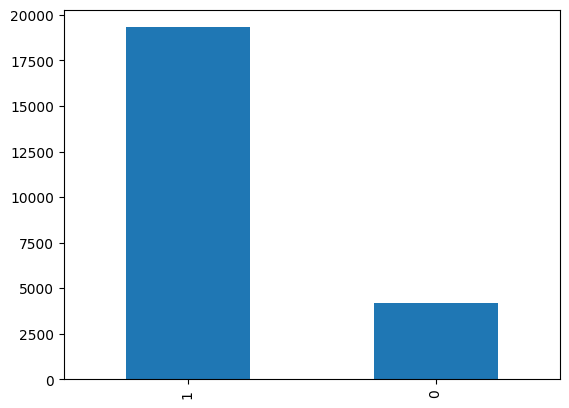

In [4]:
df['Recommended IND'].value_counts().plot(kind = 'bar')

In [5]:
df.shape

(23486, 11)

In [6]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [7]:
df['Review Text']=df['Review Text'].fillna('No Reviews')

In [8]:
null = ['Division Name','Department Name','Class Name']

#### Imputing the null values with the mode of the variable which may not be idea but just imputing it for further analysis

In [9]:
for i in null:
    df[i] = df[i].fillna(df[i].mode()[0])

In [10]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

#### Dropping unnecessary columns and encoding categorical variables

In [11]:
df.drop(['Unnamed: 0','Clothing ID','Title'],axis = 1,inplace = True)

In [12]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [13]:
dummy = ['Division Name','Department Name','Class Name']

In [14]:
le = LabelEncoder()
for i in dummy:
      df[i] = le.fit_transform(df[i])

In [15]:
df

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,2,2,5
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,0,1,3
2,60,I had such high hopes for this dress and reall...,3,0,0,0,1,3
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,1,0,13
4,47,This shirt is very flattering to all due to th...,5,1,6,0,4,0
...,...,...,...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,1,0,1,1,3
23482,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,1,4,8
23483,31,"This fit well, but the top was very see throug...",3,0,1,1,1,3
23484,28,I bought this dress for a wedding i have this ...,3,1,2,0,1,3


In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
df['Review Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 23486, dtype: object

#### Removed stop words and performed stemming

In [18]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
stem_list = []
stemmer = PorterStemmer()
for i in range(0, len(df['Review Text'])):
    review = re.sub('[^a-zA-Z]', ' ', df['Review Text'][i])
    review = review.lower()
    review = nltk.word_tokenize(review)

    review = [stemmer.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    stem_list.append(review)


In [33]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemm_list = []
lemmatizer = WordNetLemmatizer()
for i in range(0, len(df['Review Text'])):
    review = re.sub('[^a-zA-Z]', ' ', df['Review Text'][i])
    review = review.lower()
    review = nltk.word_tokenize(review)

    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    lemm_list.append(review)

[nltk_data] Downloading package wordnet to /root/nltk_data...


#### Removed stop words and performed lemmatization

In [46]:
lemm_list_w = []
lemmatizer = WordNetLemmatizer()
for i in range(0, len(df['Review Text'])):
    review = re.sub('[^a-zA-Z]', ' ', df['Review Text'][i])
    review = review.lower()
    review = nltk.word_tokenize(review)

    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    lemm_list_w.append(review)

#### Used stemmed words list, performed Bag of words, created vectors from it and performed a Naive Bayers model

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
x_stem_bow = cv.fit_transform(stem_list)

In [21]:
df_1 = df.copy()

In [22]:
bow = pd.DataFrame.sparse.from_spmatrix(x_stem_bow)

In [23]:
df_1 = pd.concat([df_1,bow],axis = 1)

In [24]:
df_1.drop('Review Text',axis = 1)

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,0,1,2,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,33,4,1,0,2,2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34,5,1,4,0,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60,3,0,0,0,1,3,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,50,5,1,0,1,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,47,5,1,6,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,34,5,1,0,1,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23482,48,3,1,0,1,4,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23483,31,3,0,1,1,1,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23484,28,3,1,2,0,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
x = df_1.drop(['Recommended IND','Review Text'],axis = 1)
y = df_1['Recommended IND']

In [26]:
x.columns = x.columns.astype(str)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [28]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [29]:
ypred_stem = spam_detect_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,ypred_stem))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       828
           1       0.94      0.92      0.93      3870

    accuracy                           0.88      4698
   macro avg       0.80      0.82      0.81      4698
weighted avg       0.89      0.88      0.89      4698



#### Performed TF-IDF to vectorize the text data and performed a Naive Bayers model

In [34]:
df_2 = df.copy()

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(lemm_list)
tfidf = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix)
df_2 = pd.concat([df_2,tfidf],axis = 1)

In [38]:
x = df_2.drop(['Recommended IND','Review Text'],axis = 1)
y = df_2['Recommended IND']
x.columns = x.columns.astype(str)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(x_train, y_train)
ypred_stem = spam_detect_model.predict(x_test)
print(classification_report(y_test,ypred_stem))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.63      0.19      0.29       828
           1       0.85      0.98      0.91      3870

    accuracy                           0.84      4698
   macro avg       0.74      0.58      0.60      4698
weighted avg       0.81      0.84      0.80      4698



In [112]:
df_3 = df.copy()

In [115]:
df_3 = df_3[['Review Text','Recommended IND']]

In [116]:
df_3

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23481,I was very happy to snag this dress at such a ...,1
23482,"It reminds me of maternity clothes. soft, stre...",1
23483,"This fit well, but the top was very see throug...",0
23484,I bought this dress for a wedding i have this ...,1


#### Performed Word lemmatization and used word vectors to vectorize the text data and performed a logistic regression model

In [117]:
def token(x):
      lemmatizer = WordNetLemmatizer()
      review = re.sub('[^a-zA-Z]', ' ',x)
      review = review.lower()
      review = nltk.word_tokenize(review)
      review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
      return review

In [119]:
df_3['token'] = df_3['Review Text'].apply(token)

<ipython-input-119-cf9075c130d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['token'] = df_3['Review Text'].apply(token)


In [121]:
df_3.head()

,Review Text,Recommended IND,token
0,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, silky, sexy, comfortable]"
1,Love this dress! it's sooo pretty. i happene...,1,"[love, dress, sooo, pretty, happened, find, st..."
2,I had such high hopes for this dress and reall...,0,"[high, hope, dress, really, wanted, work, init..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,1,"[shirt, flattering, due, adjustable, front, ti..."


In [120]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [123]:
model_wvv_1 = Word2Vec(df_3['token'])

In [124]:
def sent_vec(sent):
    vector_size = model_wvv_1.wv.vector_size
    wv_res = np.zeros(vector_size)
    ctr = 1
    for w in sent:
        if w in model_wvv_1.wv:
            ctr += 1
            wv_res += model_wvv_1.wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [125]:
df_3['vector'] = df_3['token'].apply(sent_vec)

<ipython-input-125-e3f195414604>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['vector'] = df_3['token'].apply(sent_vec)


In [126]:
df_3.head()

,Review Text,Recommended IND,token,vector
0,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, silky, sexy, comfortable]","[-0.19348156079649925, 0.21769203121463457, 0...."
1,Love this dress! it's sooo pretty. i happene...,1,"[love, dress, sooo, pretty, happened, find, st...","[0.2481385257250319, -0.5839156972865264, -0.1..."
2,I had such high hopes for this dress and reall...,0,"[high, hope, dress, really, wanted, work, init...","[-0.12307575304294005, -0.36353946281208965, 0..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,"[love, love, love, jumpsuit, fun, flirty, fabu...","[-0.38380760674675307, 0.14321744193633398, -0..."
4,This shirt is very flattering to all due to th...,1,"[shirt, flattering, due, adjustable, front, ti...","[-0.1019722931087017, 0.11290893090121887, -0...."


In [128]:
x = df_3['vector'].to_list()
y = df_3['Recommended IND'].to_list()

In [129]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y)

In [132]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
predicted = classifier.predict(x_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.70      0.45      0.55       835
           1       0.89      0.96      0.92      3863

    accuracy                           0.87      4698
   macro avg       0.79      0.71      0.74      4698
weighted avg       0.86      0.87      0.86      4698



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Used word embeddings and performed a LSTM model

In [43]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [49]:
model_wvv = Word2Vec(lemm_list_w)

In [111]:
lemm_list_w_1 = []
for i in range(0, len(lemm_list_w)):
      review = [model_wvv.wv[word].mean() for word in lemm_list_w[i] if word in model_wvv.wv]
      lemm_list_w_1.append(review)

In [134]:
voc_size=5000
onehot_repr=[one_hot(words,voc_size)for words in lemm_list]
onehot_repr

[[1513, 4153, 1780, 3677, 4705],
 [93,
  4014,
  1917,
  58,
  2825,
  3075,
  426,
  2591,
  1331,
  4928,
  4295,
  1187,
  610,
  1331,
  2532,
  1048,
  2532,
  93,
  883,
  544,
  2250,
  2959,
  4295,
  2939,
  1822,
  1650,
  1064,
  687,
  2532],
 [1215,
  2208,
  4014,
  1768,
  738,
  72,
  1965,
  1187,
  2532,
  1868,
  3697,
  685,
  1144,
  4601,
  1868,
  1868,
  2502,
  3506,
  4939,
  3305,
  2532,
  3835,
  4507,
  3376,
  2230,
  4165,
  4705,
  2764,
  740,
  2435,
  4165,
  1933,
  3880,
  4461,
  4200,
  878,
  5,
  3880,
  2524,
  831,
  736,
  2473,
  5,
  3880,
  1160,
  2092,
  4974,
  3825],
 [93, 93, 93, 4227, 923, 1368, 477, 417, 3104, 390, 1180, 3482, 3049, 759],
 [3327,
  3631,
  4713,
  526,
  4711,
  4401,
  4106,
  883,
  390,
  4112,
  2538,
  1126,
  4521,
  1449,
  93,
  3327],
 [93,
  3567,
  1194,
  4014,
  2945,
  2532,
  3162,
  4841,
  3917,
  390,
  3774,
  842,
  4014,
  58,
  4691,
  4563,
  4014,
  941,
  2813,
  481,
  1183,
  1868,
  4902

In [135]:
sent_length=58
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 1780 3677 4705]
 [   0    0    0 ... 1064  687 2532]
 [   0    0    0 ... 2092 4974 3825]
 ...
 [   0    0    0 ... 2582 4295 3049]
 [   0    0    0 ... 2433 4219  988]
 [   0    0    0 ... 2688  130 2918]]


In [136]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [138]:
x = df_3['Review Text']
y = df_3['Recommended IND']

In [137]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 58, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [139]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [143]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
246/246 [==============================] - 33s 117ms/step - loss: 0.3477 - accuracy: 0.8564 - val_loss: 0.2762 - val_accuracy: 0.8792
Epoch 2/10
246/246 [==============================] - 26s 105ms/step - loss: 0.2399 - accuracy: 0.9011 - val_loss: 0.2931 - val_accuracy: 0.8800
Epoch 3/10
246/246 [==============================] - 26s 105ms/step - loss: 0.2090 - accuracy: 0.9150 - val_loss: 0.3012 - val_accuracy: 0.8831
Epoch 4/10
246/246 [==============================] - 26s 107ms/step - loss: 0.1886 - accuracy: 0.9248 - val_loss: 0.2966 - val_accuracy: 0.8814
Epoch 5/10
246/246 [==============================] - 26s 107ms/step - loss: 0.1657 - accuracy: 0.9349 - val_loss: 0.3278 - val_accuracy: 0.8774
Epoch 6/10
246/246 [==============================] - 26s 108ms/step - loss: 0.1457 - accuracy: 0.9447 - val_loss: 0.3587 - val_accuracy: 0.8747
Epoch 7/10
246/246 [==============================] - 26s 107ms/step - loss: 0.1287 - accuracy: 0.9530 - val_loss: 0.4022 - val_ac

In [145]:
y_pred=model.predict(X_test)

243/243 [==============================] - 5s 18ms/step


In [150]:
y_pred

array([[0.9991526 ],
       [0.9989871 ],
       [0.89380676],
       ...,
       [0.99507904],
       [0.9998726 ],
       [0.9978241 ]], dtype=float32)

In [155]:
np.unique(y_test)

array([0, 1])

In [160]:
print(classification_report(np.argmax(y_pred,axis = 1),y_test))

              precision    recall  f1-score   support

           0       1.00      0.18      0.30      7751
           1       0.00      0.00      0.00         0

    accuracy                           0.18      7751
   macro avg       0.50      0.09      0.15      7751
weighted avg       1.00      0.18      0.30      7751



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
